In [2]:
import os
import glob
import numpy as np

In [3]:
path = "data/DIODE/train/outdoor/scene_00007/scan_00082"
files = sorted(glob.glob(os.path.join(path, "*.npy")))

In [4]:
avg_max = 0
for f in files:
    data = np.load(f)
    max_val = np.max(data)
    avg_max += max_val

avg_max /= len(files)

In [10]:
data = np.load(files[0])
data.max(), data.dtype

(156.64091, dtype('float32'))

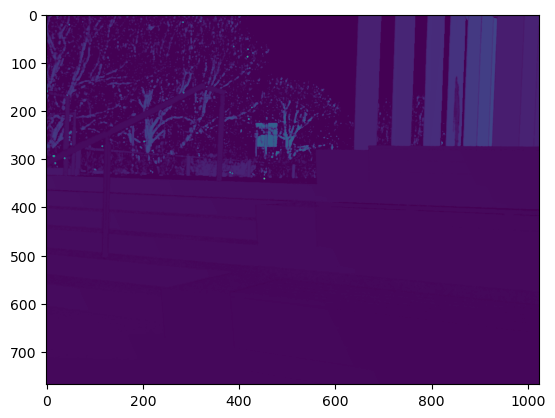

In [8]:
import matplotlib.pyplot as plt

# Load the first file
data = np.load(files[0])

# Display the data
plt.imshow(data)
plt.show()
